In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib

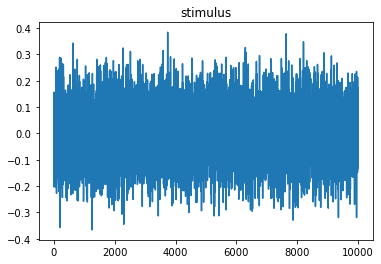

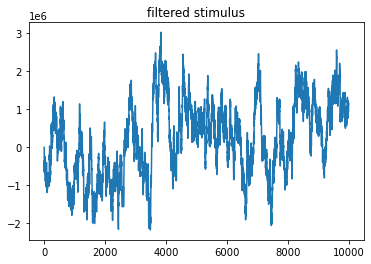

/Users/giulio/Desktop/tesi/simulazioni/lib.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*(v-v12)))


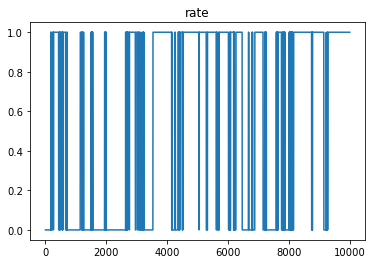

N spike: 0; max=0


<function matplotlib.pyplot.show(close=None, block=None)>

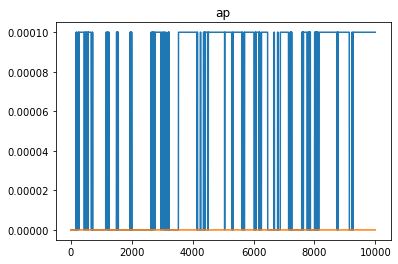

In [13]:
import importlib
importlib.reload(lib)

time_step = 0.1e-3 #s
simulation_time = 1 #s
N = (int)(simulation_time//time_step)
#noise_freq = 0.1
#N_noise = (int)(simulation_time*noise_freq)
stimulus = np.random.normal(0, 0.1e-3, size=N) # white gaussian noise
'''N_ripetizioni = (int)(1/(time_step*noise_freq))
temp = np.zeros((N_noise, N_ripetizioni))
for i in range(N_ripetizioni):
    temp[:, i] = stimulus
stimulus = np.reshape(temp.T, newshape=N_noise*N_ripetizioni)'''
plt.plot(stimulus)
plt.title("stimulus")
plt.show()

C = 1e-6 #F
R = 20000 #ohm
filter = np.zeros(N)
for i in range(N):
    filter[i] = 1/C*np.exp(-time_step*i/(R*C))
#plt.plot(filter)
#plt.title("filter")
#plt.show()
convolution = np.convolve(stimulus, filter)[:N]
plt.plot(convolution)
#plt.axis([0, 600, -0.5, 0.5])
plt.title("filtered stimulus")
plt.show()

rate = np.zeros(N)
rate = lib.sigmoidal_nonlinearity(convolution)
plt.plot(rate)
#plt.axis([0, 600, 0, 1.1])
plt.title("rate")
plt.show()

spike_probability=np.zeros(N)
#spike_probability = lib.poisson(rate, time_step)
spike_probability = time_step*rate
plt.plot(spike_probability)
plt.title("spike probability")
plt.show

ap = np.zeros(N)
for i in range(N):
    rand = np.random.random()
    ap[i] = 1 if rand < spike_probability[i] else 0
#plt.plot(ap)
#plt.axis([0, 600, 0, 1.1])
#plt.title("ac")
#plt.show

minimum_interspike_time = (int)(0.002/time_step)
count = 0
for i in range(N):
    if ap[i] == 1:
        if count < minimum_interspike_time:
            ap[i] = 0
        else:
            count = 0
    count+=1

print("N spike: %d; max=%d"% (np.sum(ap), np.max(ap)))
duration = (int)(np.floor(0.002/time_step))
persistence = np.zeros(N)
for i in range(duration):
    persistence[i] = 1
ap = np.convolve(ap, persistence)[:N]
plt.plot(ap)
#plt.axis([0, 600, 0, 1.1])
plt.title("ap")
plt.show